>> 4_1 이론 파트

딥러닝은 이미지 인식에서 뛰어난 성능을 보이며, 특히 합성곱 신경망(Convolutional Neural Network)을 통해 이미지의 주요 특징을 추출하고 구별할 수 있다. 

In [26]:
# 구글 드라이브 연동
from IPython.display import Image

from google.colab import drive
drive.mount('/g')

Drive already mounted at /g; to attempt to forcibly remount, call drive.mount("/g", force_remount=True).


구글에서는 2012년 고양이와 사람을 구별할 수 있는 초기형태의 인공신경망 모델을 발표하였음

https://static.googleusercontent.com/media/research.google.com/ko//archive/unsupervised_icml2012.pdf

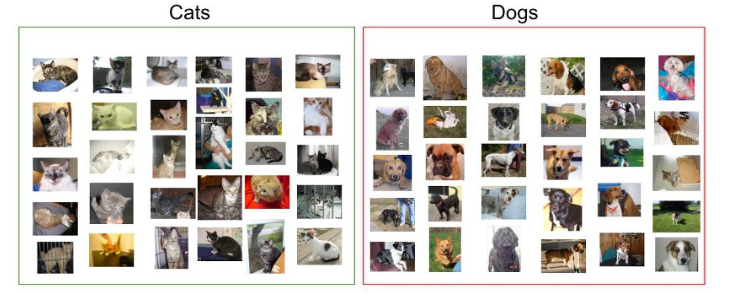

In [27]:
Image(filename='/g/My Drive/AI_한기대/images/4_1dogsncats.PNG', width=600) 

1. 합성곱 신경망의 앞부분은 이미지로부터 특성을 추출하는 합성곱 연산과 사이즈를 줄이는 Pooling 레이어로 이루어져 있습니다. 이 과정을 통해 이미지의 주요 특징들이 더 작은 사이즈의 레이어에 추출됩니다. 이 과정에서 채널의 수는 증가하는 것이 일반적입니다. 

2. 추출된 특징을 한개의 1차원 배열로 변환하여 주며, 이 부분은 앞 강의에서 배운 것처럼 Hidden Layer를 가진 Fully Connected Layer로 연결해 줍니다. 

3. Output은 분류하려는 Class의 개수 만큼 만들어 줍니다. 이때 Softmax 함수를 사용하여 각 Class에 대한 확률을 계산합니다. 


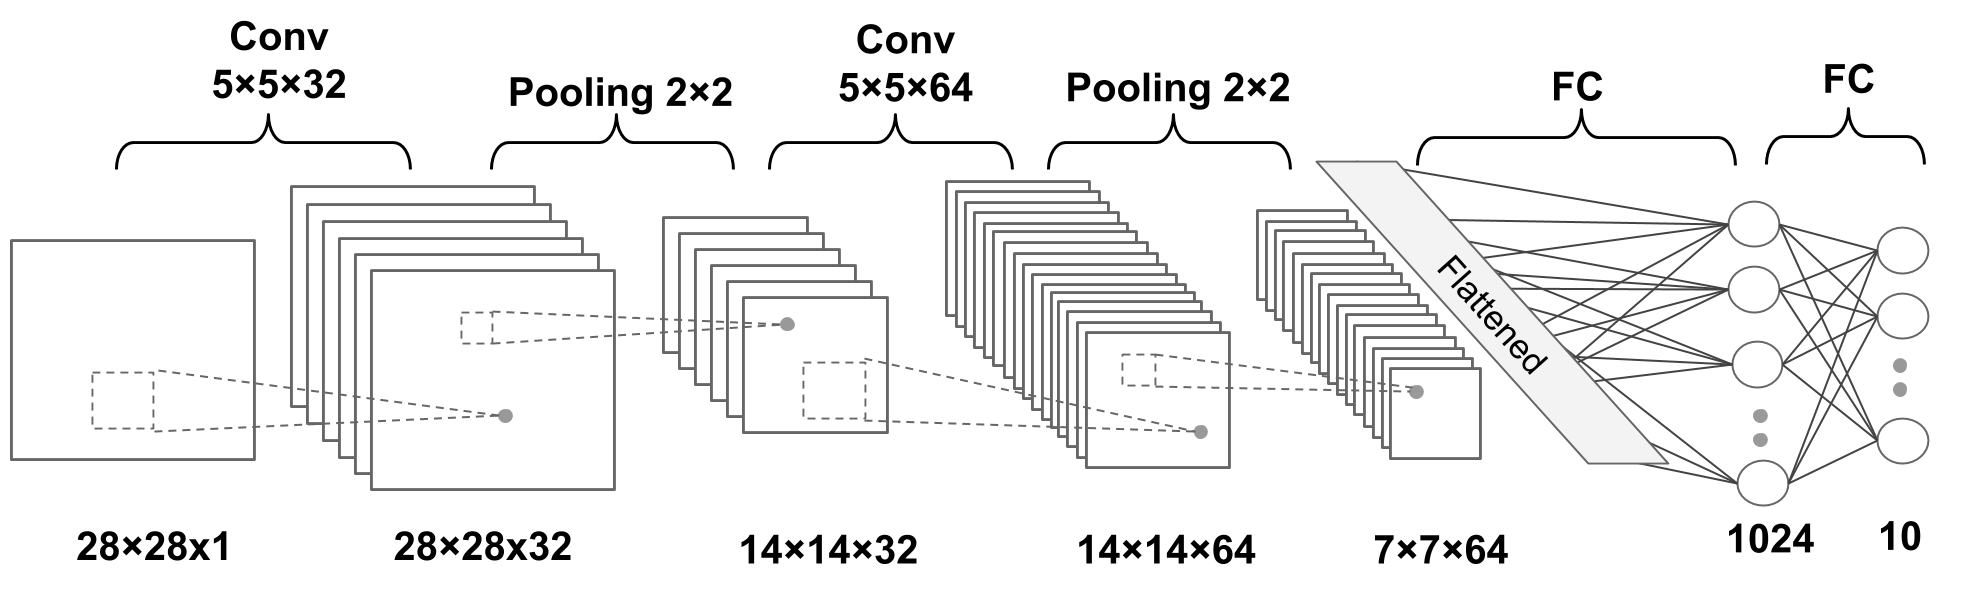

In [28]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_12.png', width=600) 

합성곱 연산에 대해 알아봅시다. 

아래 그림처럼 X라는 행렬과 W를 곱하는 합성곱해봅시다. 
X는 이미지 W는 Neural Network의 가중치라고 생각하면 됩니다.

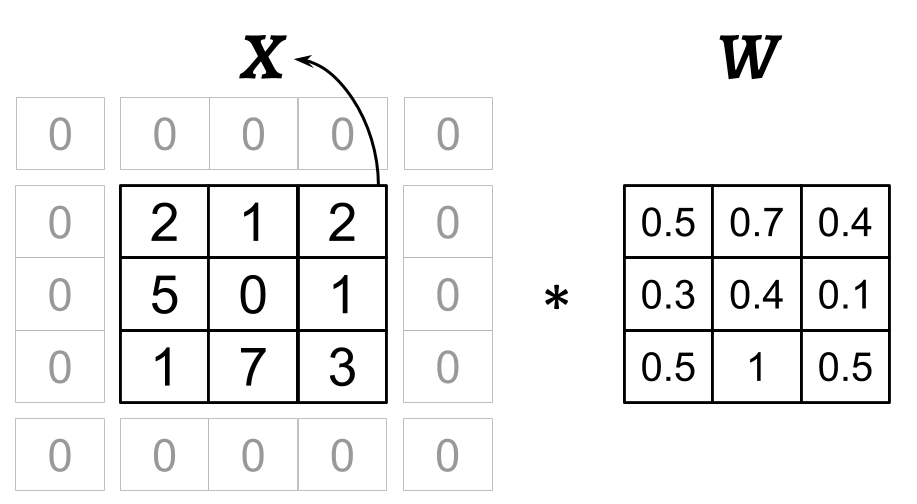

In [29]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_06.png', width=600) 

Padding은 합성곱 연산 시 가장자리의 연산을 위해 추가로 사이즈를 확장하여 값을 넣어주는 것입니다.

텐서플로우에서는 패딩이 없이 유효한 데이터만 사용하는 것을 VALID, 원래의 사이즈와 같아지도로 패딩을 추가하는 것을 SAME이라고 합니다.  

https://api.wandb.ai/files/krishamehta/images/projects/98762/d4aac0af.gif

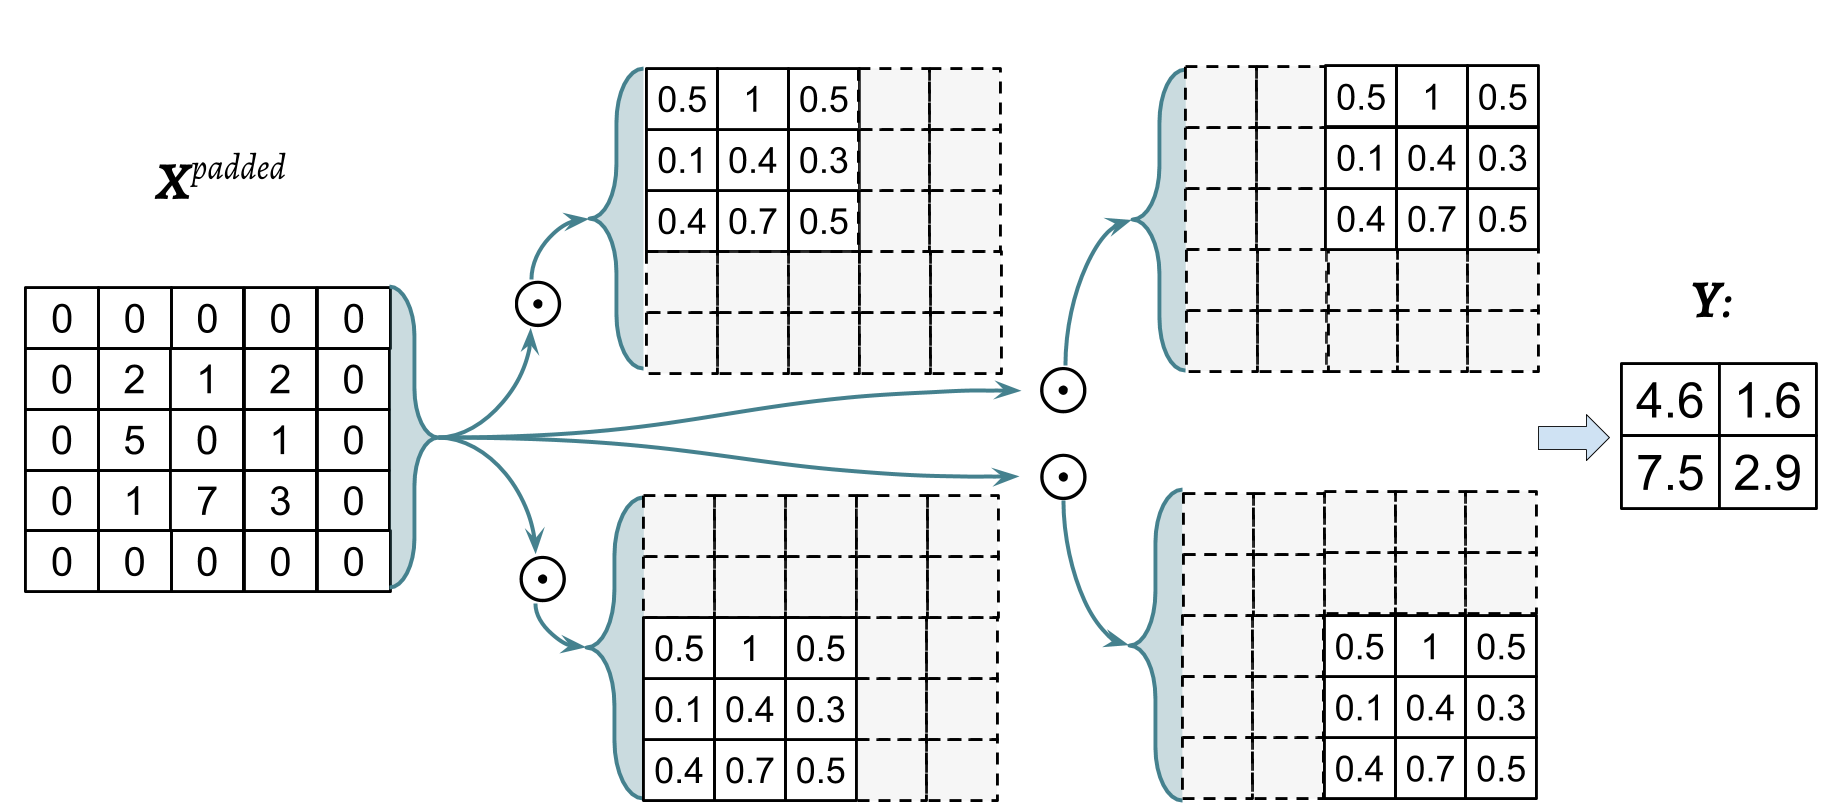

In [30]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_07.png', width=600) 

Pooling은 행렬 중에서 대표값 한개를 추출하는 것을 말합니다. 

* Maxpooling은 최대값을 추출합니다. 

* Average Pooling은 평균값을 추출합니다. 

합성곱 신경망에서는 주로 Maxpooing을 사용합니다. 특징 추출에 유리하기 때문입니다.

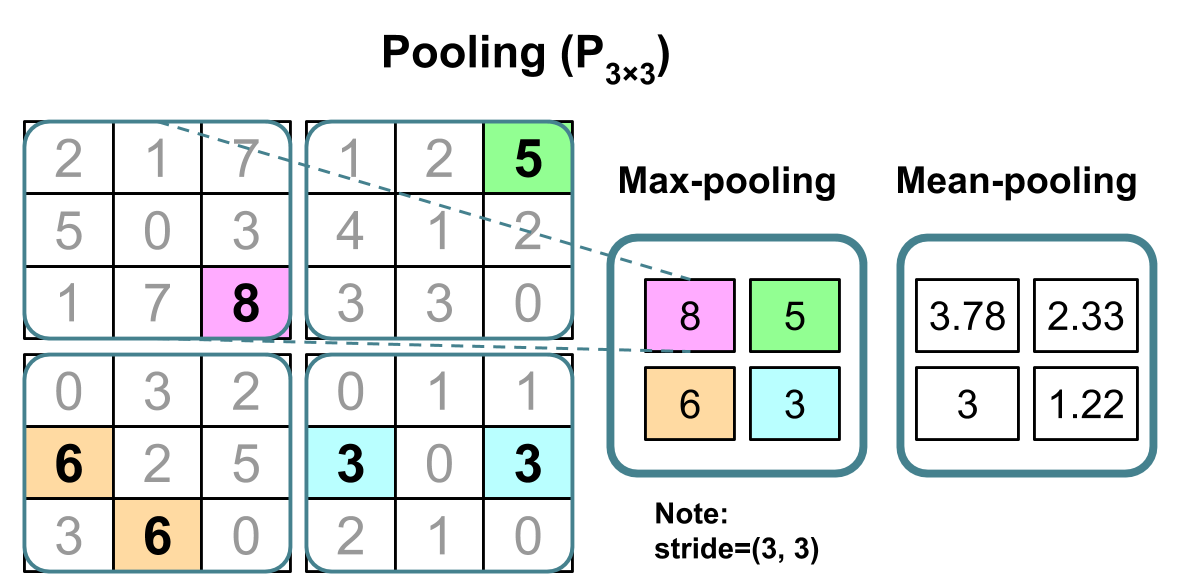

In [31]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_08.png', width=600) 

최종 단계에서 분류할 때에는 이진 분류(Binary Classification)과 다중분류(Multiclass Classfication)이 있습니다. 

분류에서는 Loss Function(오차를 계산)은 Crossentropy를 사용합니다.

이때 Onehot Encoding이 된 데이터는 Categorical Crossentropy를 그렇지 않은 경우는 Sparse Categorical Crossentropy를 사용합니다. 


one hot encoding은 라벨의 값을 벡터화하여 수치값의 영향을 줄여줍니다

https://miro.medium.com/max/1400/1*ggtP4a5YaRx6l09KQaYOnw.png

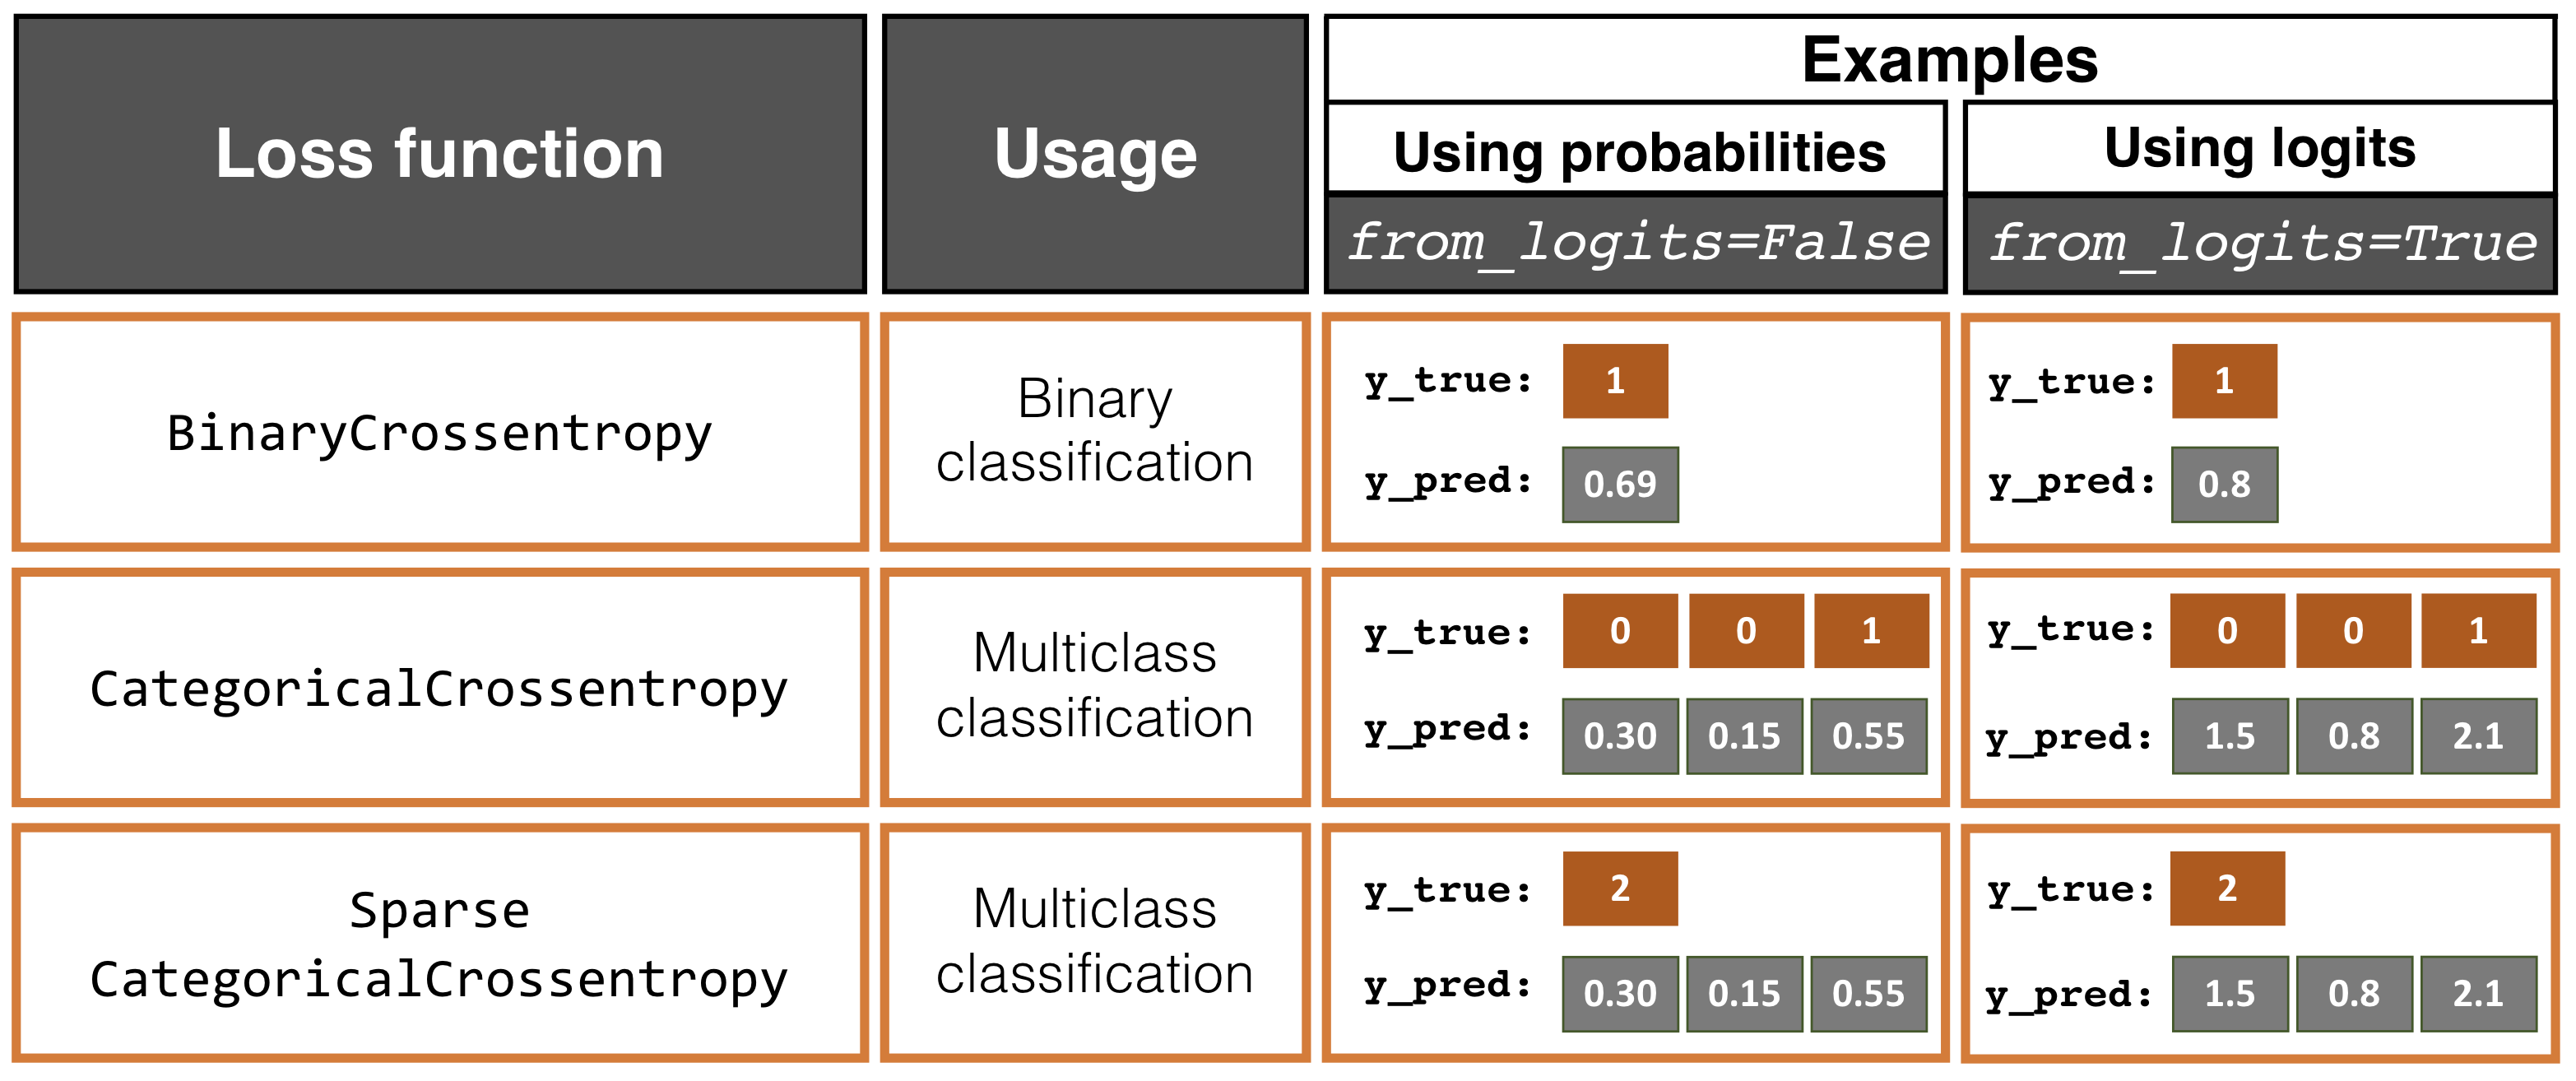

In [32]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_11.png', width=600) 

>> 4_2 코딩 파트

1. 데이터 불러오기

In [33]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [34]:
x_train.shape

(60000, 28, 28)

2. 데이터 나누기
데이터가 Train Set과 Test set으로 나뉘어서 자장된 상태입니다. 
학습 과정에서의 검증을 위해 train set을 다시 train set과 validation set으로 나눕니다. 

이때 validation set은 학습 중에 모델에 대한 검증을 하는데 활용됩니다


In [35]:
# train set 에서 10000개를 validation set으로 나눔
x_val, y_val = x_train[50000:,:], y_train[50000:]   # 50000~59999까지 validation으로 나눔
x_train, y_train = x_train[:50000, :], y_train[:50000] # 0~49999까지 train set으로 저장


In [36]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(50000, 28, 28)
(10000, 28, 28)
(50000,)
(10000,)


3. 데이터 표준화/정규화

데이터의 수치값을 일정하게 만들어줍니다. 이를 통해 학습속도가 향상되는 결과를 볼 수 있습니다. 

https://jsideas.net/assets/img/20180128.png

* 정규화 (Normalization)

https://velog.velcdn.com/images/cbkyeong/post/7696b9f7-9607-4c60-9208-f27b0b4f1f2b/image.png

데이터의 최대/최소값을 활용하여 0~1사이로 만들어 줍니다. 

* 표준화(Standarization)

https://velog.velcdn.com/images/cbkyeong/post/797c100e-c982-4859-b031-a87d4b23d189/image.png

데이터를 평균 0, 표준편차 1로 변환합니다. 

https://velog.velcdn.com/images/cbkyeong/post/e7e722ad-a362-4b22-8d7e-8b9015e5fc24/image.jpeg

*  Numpy를 통해 평균을 구합니다. 이미지 전체의 평균값을 구하기 위해 axis=0을 입력하였습니다. 

* axis에 따라서 평균을 계산할 때 기준이 달라지게 됩니다

In [37]:
# 데이터 표준화

import numpy as np
mean = np.mean(x_train, axis=0)  


In [38]:
mean.shape  # 전체 이미지의 평균값이 도출됩니다

(28, 28)

In [39]:
std = np.std(x_train)  # 표준편차를 계산합니다. 

In [40]:
std

78.6661972212754

표준화하여 저장합니다. 

In [41]:
x_train_centered = (x_train-mean)/std
x_val_centered = (x_val-mean)/std
x_test_centered = (x_test-mean)/std

In [42]:
x_train_centered.shape

(50000, 28, 28)

Text(0.5, 1.0, 'Standarized')

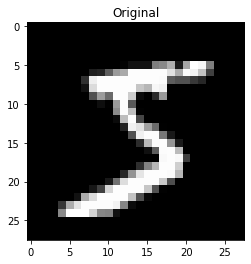

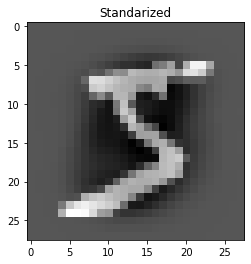

In [43]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.title('Original')
plt.figure()
plt.imshow(x_train_centered[0], cmap='gray')
plt.title('Standarized')


label 값을 onehot encoding으로 변환해봅시다

텐서플로우에서는 to_categrical 함수를 통해 변환할 수 있습니다

In [44]:
y_val.shape

(10000,)

In [45]:
# one hot encoding
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_val_onehot = to_categorical(y_val)
y_test_onehot = to_categorical(y_test)

One hot encoding 이후 출력 값이 변경된 걸 볼 수 있습니다. 

In [46]:
print('Original: ', y_train[0])
print('One Hot: ', y_train_onehot[0])

Original:  5
One Hot:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


아래 이미지를 참고하여 단순한 모델을 만들어 보겠습니다. 

코딩은 아래의 사이즈로 진행하였습니다 ** 추후 이미지에 숫자 수정 필요

28x28x1 --> 24x24x32 --> 12x12x32 --> 8x8x64--> 4x4x64

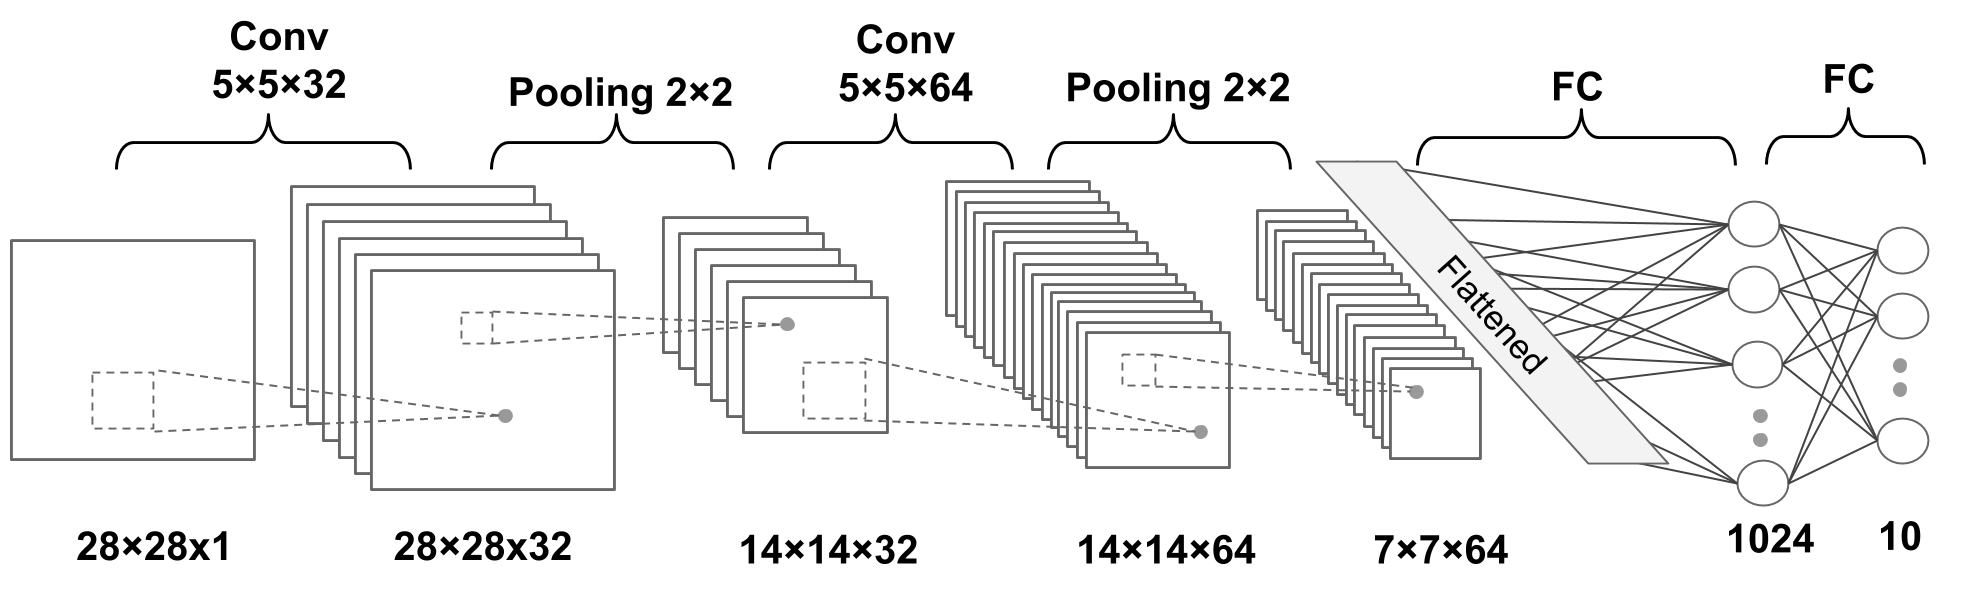

In [ ]:
Image(filename='/g/My Drive/Tensorflow AI/images_ch15/15_12.png', width=600) 

In [49]:
# model 만들기

from tensorflow.keras import layers, models
model = models.Sequential()

위의 그림처럼 각각의 레이어를 한줄씩 추가하였습니다

In [50]:
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))

In [51]:
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())


In [54]:
# dense layer에 넣기
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

모델 학습을 설정합니다. One hot encoding을 하였으므로 categorical_crossentropy를 사용합니다. optimizer는 adam optimizer가 가장 널리 사용됩니다. 

In [56]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [57]:
x_train_c = x_train_centered.reshape(-1, 28,28,1)  # -1은 추정으로 정한다
x_val_c = x_val_centered.reshape(-1,28,28,1)
x_test_c = x_test_centered.reshape(-1,28,28,1)

In [58]:
import time
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

callback_list = [ModelCheckpoint(filepath='cnn_checkpoint.h5', monitor='val_loss',
                                 save_best_only=True),
                 TensorBoard(log_dir='logs/{}'.format(time.asctime()))]

In [59]:
history=model.fit(x_train_c, y_train_onehot, batch_size=64, epochs=20,
                  validation_data=(x_val_c, y_val_onehot), 
                  callbacks=callback_list)

Epoch 1/20
782/782 [==============================] - 15s 5ms/step - loss: 0.3916 - acc: 0.8685 - val_loss: 0.0695 - val_acc: 0.9822
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0724 - acc: 0.9803 - val_loss: 0.0611 - val_acc: 0.9846
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0506 - acc: 0.9864 - val_loss: 0.0444 - val_acc: 0.9880
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0397 - acc: 0.9894 - val_loss: 0.0414 - val_acc: 0.9895
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0342 - acc: 0.9904 - val_loss: 0.0426 - val_acc: 0.9897
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0308 - acc: 0.9915 - val_loss: 0.0474 - val_acc: 0.9897
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0287 - acc: 0.9924 - val_loss: 0.0555 - val_acc: 0.9873
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 0